<a href="https://colab.research.google.com/github/Darshini-A/Data-Storage-Management/blob/main/PollutionTestCNN%204%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
test = pd.read_csv('/content/pollution_test_data.csv')
test.head()

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93


<Axes: >

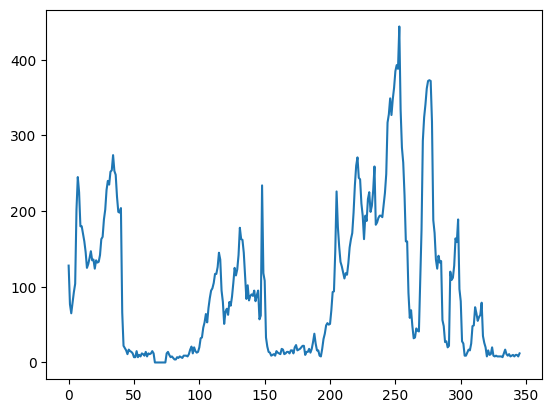

In [ ]:
target = test['pollution']
target.plot()

In [ ]:
def wind_encode(s):
  if s == "SE":
    return 1
  elif s == "NE":
    return 2
  elif s == "NW":
    return 3
  else:
    return 4

test["wind_dir"] = test["wnd_dir"].apply(wind_encode)
test = test.drop(["wnd_dir"],  axis = 1).head()
test.head()

,dew,temp,press,wnd_spd,snow,rain,pollution,wind_dir
0,-16,4,1027,3.58,0,0,128,1
1,-17,5,1027,7.60,0,0,77,1
2,-16,4,1027,9.39,0,0,65,1
3,-16,1,1028,0.89,0,0,79,4
4,-14,0,1028,1.79,0,0,93,2


In [ ]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i : i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

WINDOW_SIZE = 6
X, y= df_to_X_y(target, WINDOW_SIZE)
X.shape, y.shape

((340, 5, 1), (340,))

In [ ]:
X_train, y_train = X[:170], y[:170]
X_val, y_val = X[170:], y[170:340]

In [ ]:
model = Sequential()
model.add(InputLayer((5,1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             192       
                                                                 
 dense_4 (Dense)             (None, 4, 8)              520       
                                                                 
 dense_5 (Dense)             (None, 4, 1)              9         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001),
metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=1, callbacks=[cp])

Epoch 1/10
6/6 [==============================] - 2s 190ms/step - loss: 11141.8838 - root_mean_squared_error: 105.9376 - val_loss: 27957.7051 - val_root_mean_squared_error: 170.6813
Epoch 2/10
6/6 [==============================] - 2s 317ms/step - loss: 11135.4307 - root_mean_squared_error: 105.9597 - val_loss: 27913.9492 - val_root_mean_squared_error: 170.5477
Epoch 3/10
6/6 [==============================] - 1s 138ms/step - loss: 11119.0361 - root_mean_squared_error: 105.3808 - val_loss: 27873.5996 - val_root_mean_squared_error: 170.4244
Epoch 4/10
6/6 [==============================] - 1s 138ms/step - loss: 11106.3018 - root_mean_squared_error: 107.0179 - val_loss: 27833.8535 - val_root_mean_squared_error: 170.3029
Epoch 5/10
6/6 [==============================] - 1s 139ms/step - loss: 11097.1416 - root_mean_squared_error: 104.4650 - val_loss: 27796.2207 - val_root_mean_squared_error: 170.1877
Epoch 6/10
6/6 [==============================] - 1s 133ms/step - loss: 11087.4980 - root_